- Clustering: Goal is to group similar instances together into clusters.
- Anomaly detection: objective is to learn what "normal" data looks like and the to detect abnormal instances, such as detective items on a production line or new trend in a time deries.
- Density estimation: goal is to estimate the probability density function (PDF) of the random process of the random process that generated the dataset. Density estimation can be used for anomaly detection. 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import os
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(42)
Colors = ['#004165','#dc4200',  '#69be28', '#f0be00', '#0cc6de', '#bed600', '#006983', '2b580c', '639a67']

Project_Root_Directory = "."
Section_Id             = "Unsupervised Learning"
Images_Path            = os.path.join(Project_Root_Directory, "images", Section_Id)
os.makedirs(Images_Path, exist_ok =True)

## Clustering

In [2]:
from sklearn.datasets  import load_iris
from sklearn.cluster import KMeans
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
np.unique(y)

array([0, 1, 2])

In [27]:
def plot_iris(X,y, labels = ["Iris setosa","Iris versicolor", "Iris virginica"]):
    groups = len(labels)
    Markers = ["yo", "bs", "g^", "r*"]
    plt.figure(figsize=(12, 4))
    for k in groups:
        plt.plot(X[y==k, 2], X[y==k, 3], Markers[k], label=labels[k])
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(fontsize=12)
    plt.show()

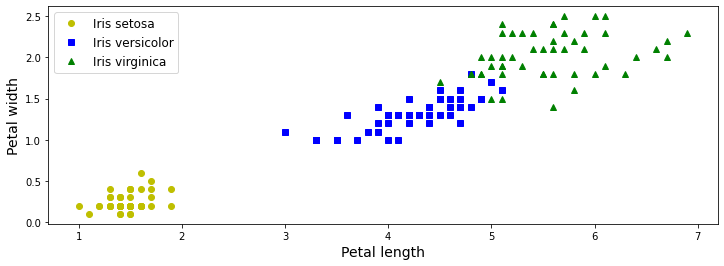

In [28]:
plot_iris(X,y, labels = ["Iris setosa","Iris versicolor", "Iris virginica"])

In [31]:
from sklearn.mixture import GaussianMixture
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

In [32]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

{2: 0, 0: 1, 1: 2}

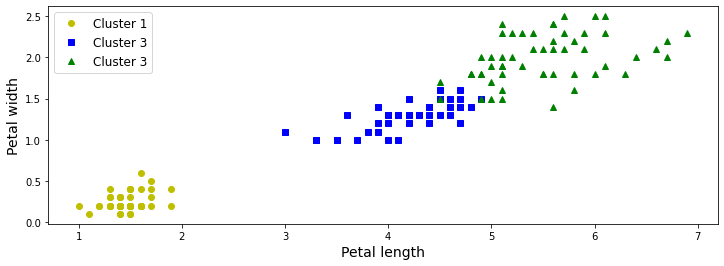

In [33]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
plot_iris(X,y_pred, labels = ["Cluster 1","Cluster 3","Cluster 3"])

In [34]:
print(np.sum(y_pred==y))
print(np.sum(y_pred==y) / len(y_pred))

145
0.9666666666666667


In [35]:
# K-Means
from sklearn.datasets import make_blobs
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8], [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [36]:
X,Y = make_blobs( n_samples =1000, centers = blob_centers, cluster_std = blob_std, random_state = 7)

In [38]:
def plot_clusters(X, y=None):
    plt.figure(figsize =(10,4))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.show()

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


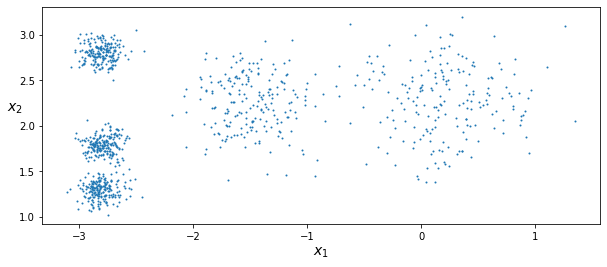

In [39]:
plot_clusters(X)

In [48]:
from sklearn.cluster import KMeans
k= 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)


In [49]:
y_pred is kmeans.labels_

True

In [50]:
print("cluster centers:", kmeans.cluster_centers_)
print("labels:", np.unique(kmeans.labels_))

cluster centers: [[-2.77986689  1.79516229]
 [ 0.20088156  2.2751718 ]
 [-1.47273449  2.25383102]
 [-2.80248802  2.8023078 ]
 [-2.80906999  1.29323645]]
labels: [0 1 2 3 4]


In [51]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3])

## Decision Boundaries - Voronoi diagram

In [60]:
help(plt.contourf)

Help on function contourf in module matplotlib.pyplot:

contourf(*args, data=None, **kwargs)
    Plot contours.
    
    Call signature::
    
        contour([X, Y,] Z, [levels], **kwargs)
    
    `.contour` and `.contourf` draw contour lines and filled contours,
    respectively.  Except as noted, function signatures and return values
    are the same for both versions.
    
    Parameters
    ----------
    X, Y : array-like, optional
        The coordinates of the values in *Z*.
    
        *X* and *Y* must both be 2-D with the same shape as *Z* (e.g.
        created via `numpy.meshgrid`), or they must both be 1-D such
        that ``len(X) == M`` is the number of columns in *Z* and
        ``len(Y) == N`` is the number of rows in *Z*.
    
        If not given, they are assumed to be integer indices, i.e.
        ``X = range(M)``, ``Y = range(N)``.
    
    Z : array-like(N, M)
        The height values over which the contour is drawn.
    
    levels : int or array-like, option

In [58]:
def plot_data(X):
    plt.plot(X[:, 0], X[:,1], "k.", markersize =2)
    
def plot_centroids(centroids, weights = None, circle_color ="w", cross_color ="r"):
    if weights is not None:
        centroids = centroids[weights > weights.max() /10]
    plt.scatter(centroids[:,0], centroids[:,1], marker = 'o', s =35, linewidths=8, color = circle_color, zorder =10, alpha =.9)
    plt.scatter(centroids[:,0], centroids[:,1], marker = 'o', s =2, linewidths=12, color = cross_color, zorder =11, alpha =1)
    
def plot_decision_boundaries(clf, X, resolution =1000, show_centroids =True,
                            show_xlabels = True, show_ylabels =True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

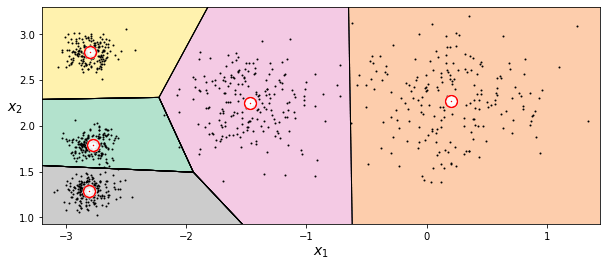

In [59]:
plt.figure(figsize=(10, 4))
plot_decision_boundaries(kmeans, X)
plt.show()